In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn .metrics import confusion_matrix,classification_report,accuracy_score

In [3]:
data=pd.read_csv("datasets_228_482_diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
import seaborn as sns

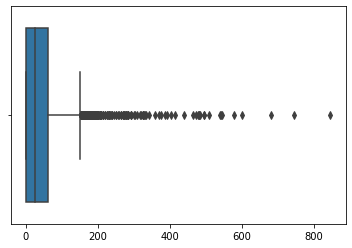

In [8]:
sns.boxplot(data)

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

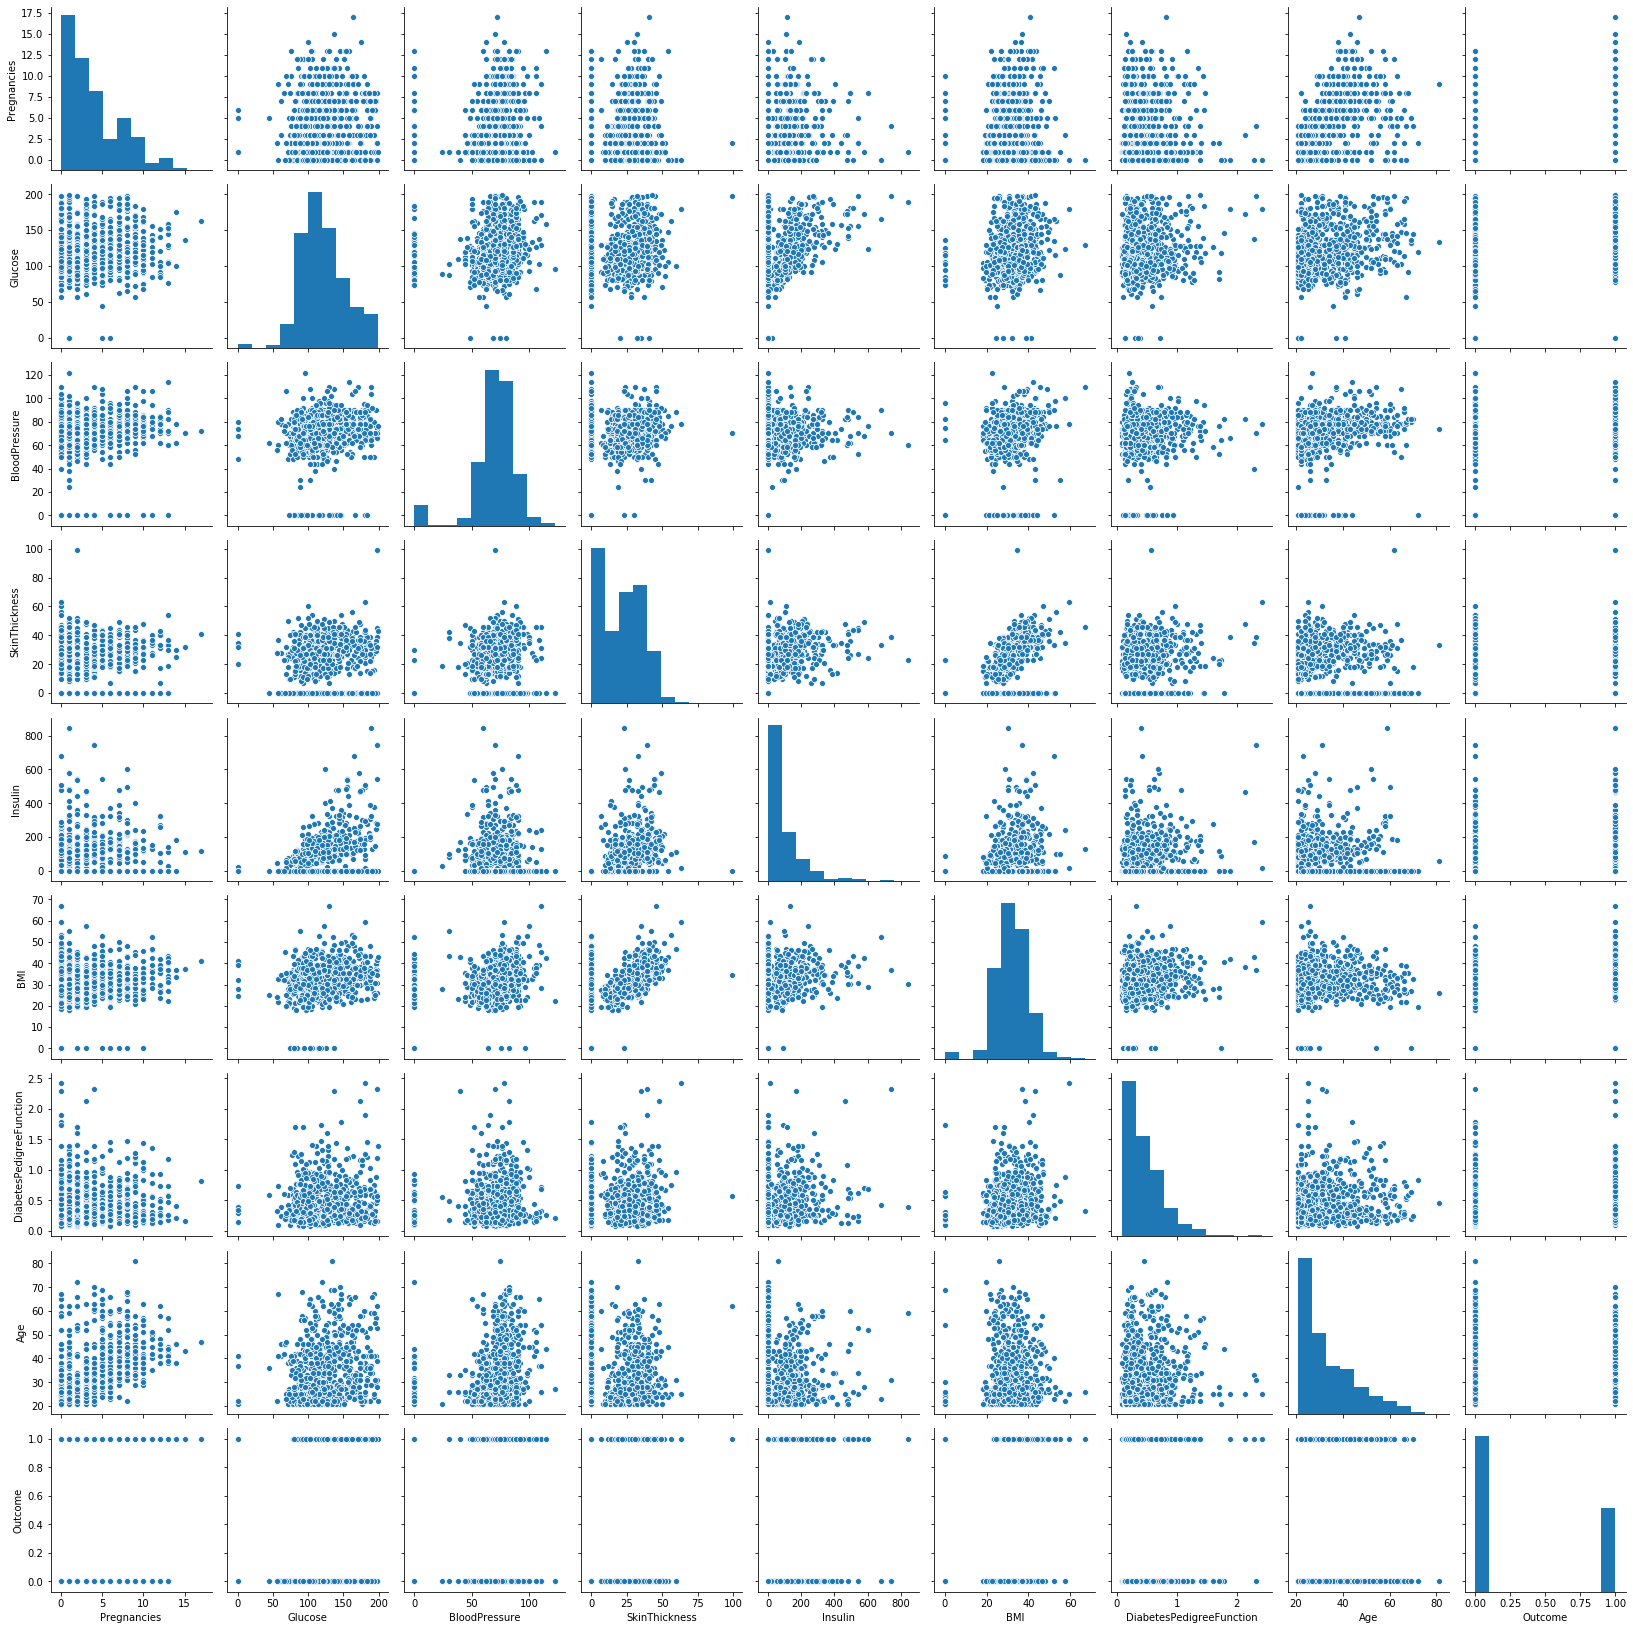

In [10]:
sns.pairplot(data)

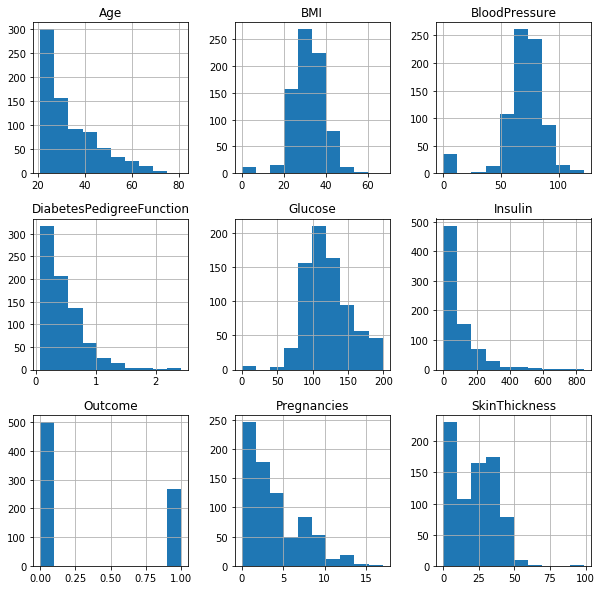

In [17]:
data.hist(figsize=(10,10))
plt.show()

In [21]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


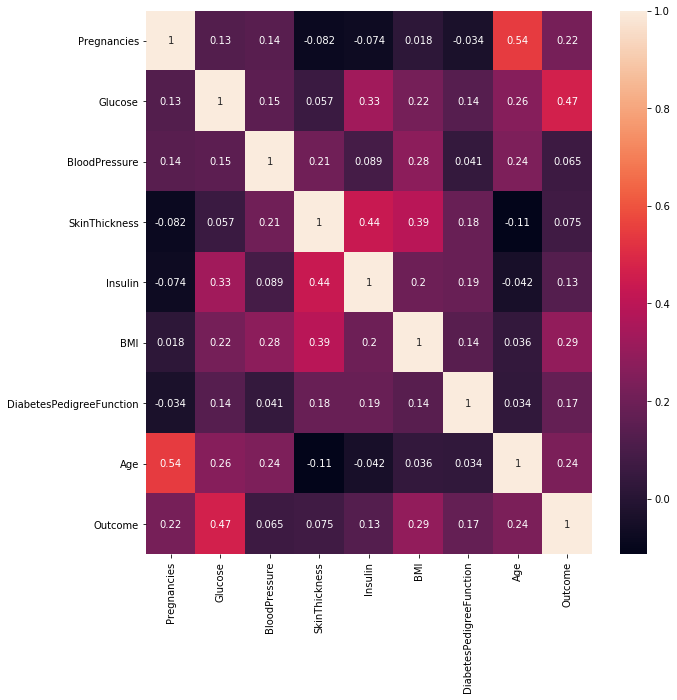

In [22]:
a=data.corr()
f=a.index
plt.figure(figsize=(10,10))
s=sns.heatmap(data[f].corr(),annot=True)

In [23]:

x=data.drop(['Outcome'],axis=1)
y=data['Outcome']


In [24]:
x.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [25]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

In [28]:
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)


[0.11096841 0.23385716 0.09998918 0.07926488 0.07113745 0.14323835
 0.11807597 0.1434686 ]


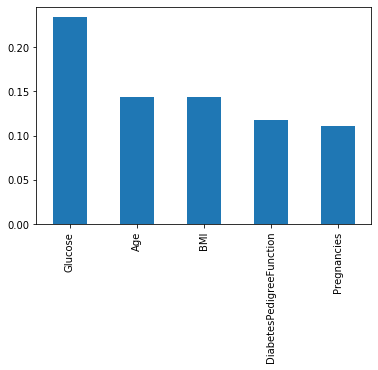

In [31]:
fet=pd.Series(model.feature_importances_,index=x.columns)
fet.nlargest(5).plot(kind='bar')
plt.show()

In [32]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)
print(x_train,y_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
197            3      107             62             13       48  22.9   
234            3       74             68             28       45  29.7   
478            8      126             74             38       75  25.9   
369            1      133            102             28      140  32.8   
521            3      124             80             33      130  33.2   
..           ...      ...            ...            ...      ...   ...   
0              6      148             72             35        0  33.6   
348            3       99             62             19       74  21.8   
744           13      153             88             37      140  40.6   
78             0      131              0              0        0  43.2   
180            6       87             80              0        0  23.2   

     DiabetesPedigreeFunction  Age  
197                     0.678   23  
234                     0.293   23  


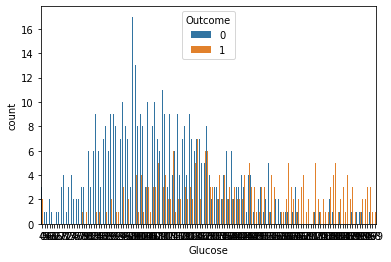

In [33]:
sns.countplot(x='Glucose',hue='Outcome',data=data)

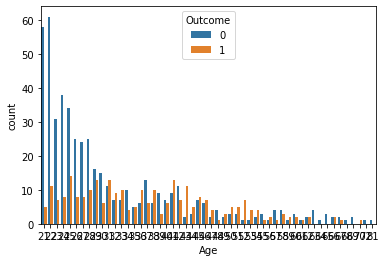

In [34]:
sns.countplot(x='Age',hue='Outcome',data=data)

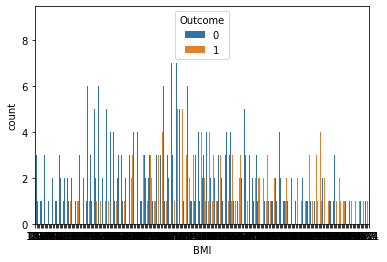

In [35]:
sns.countplot(x='BMI',hue='Outcome',data=data)

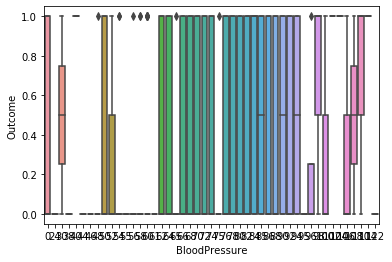

In [38]:
sns.boxplot('BloodPressure','Outcome',data=data)

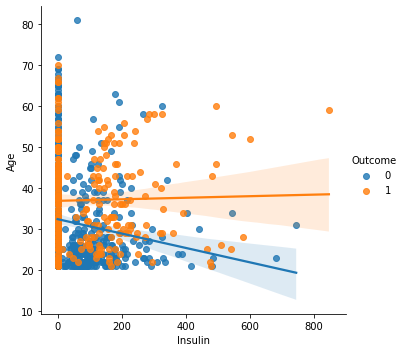

In [43]:
sns.lmplot(x='Insulin',y='Age',hue='Outcome',data=data)

In [44]:
cls=LogisticRegression()

cls.fit(x_train,y_train)

pre=cls.predict(x_test)

C:\Users\Ranjith ch\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [49]:
y_test

668    0
704    0
257    0
232    0
29     0
      ..
251    0
684    0
282    0
145    0
52     0
Name: Outcome, Length: 77, dtype: int64

In [47]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
704,4,110,76,20,100,28.4,0.118,27
257,2,114,68,22,0,28.7,0.092,25
232,1,79,80,25,37,25.4,0.583,22
29,5,117,92,0,0,34.1,0.337,38
...,...,...,...,...,...,...,...,...
251,2,129,84,0,0,28.0,0.284,27
684,5,136,82,0,0,0.0,0.640,69
282,7,133,88,15,155,32.4,0.262,37
145,0,102,75,23,0,0.0,0.572,21


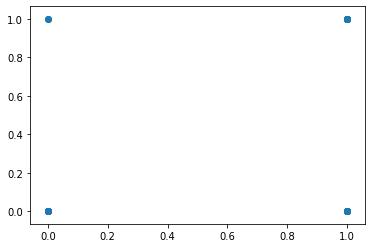

In [51]:
plt.scatter(y_test,pre)

In [52]:
print(sklearn.metrics.accuracy_score(y_test,pre))
print(sklearn.metrics.classification_report(y_test,pre))

0.8181818181818182
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        53
           1       0.86      0.50      0.63        24

    accuracy                           0.82        77
   macro avg       0.83      0.73      0.76        77
weighted avg       0.82      0.82      0.80        77



In [54]:
print(sklearn.metrics.precision_score(y_test,pre))

0.8571428571428571


In [55]:
print(sklearn.metrics.confusion_matrix(y_test,pre))

[[51  2]
 [12 12]]


In [56]:
print(sklearn.metrics.recall_score(y_test,pre))

0.5


In [57]:
print(sklearn.metrics.f1_score(y_test,pre))

0.631578947368421


([<matplotlib.patches.Wedge at 0x27ba9b62e48>,
 [Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.0905893469510741, 0.14357881569657108, ''),
  Text(1.0162674808358718, 0.42095178749532736, ''),
  Text(0.8726886612586932, 0.6696375889318864, ''),
  Text(1.278398955422364, 1.6660420495218626, ''),
  Text(0.5499999702695115, 0.9526279613277875, ''),
  Text(0.8036351398480603, 1.9401470464893604, ''),
  Text(0.27410491431730727, 2.0820342206474662, ''),
  Text(-5.149471629032507e-08, 1.0999999999999988, ''),
  Text(-5.149471629032507e-08, 1.0999999999999988, ''),
  Text(-5.149471629032507e-08, 1.0999999999999988, ''),
  Text(-5.149471629032507e-08, 1.0999999999999988, ''),
  Text(-0.2741051092514179, 2.082034194983903, ''),
  Text(-0.4209518350702412, 1.0162674611296953, ''),
  Text(-1.2783991114084725, 1.6660419298295068, ''),
  Text(-1.4849243447632272, 1.4849241362202652, ''),
  Text(-0.7778175139235952, 0.777817404686

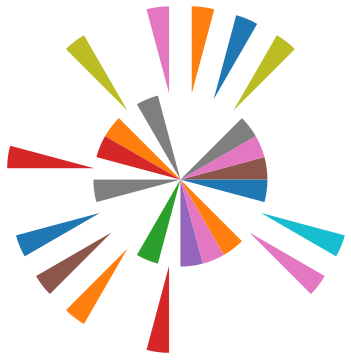

In [58]:
plt.pie(y_test,pre)